In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

### Interest, GDP deflator Data

In [3]:
print(sm.datasets.interest_inflation.NOTE)

::
    Number of Observations - 107

    Number of Variables - 2

    Variable name definitions::

        year      - 1972q2 - 1998q4
        quarter   - 1-4
        Dp        - Delta log gdp deflator
        R         - nominal long term interest rate



In [4]:
dta = sm.datasets.interest_inflation.load_pandas().data
dta.head()

,year,quarter,Dp,R
0,1972.0,2.0,-0.003133,0.083
1,1972.0,3.0,0.018871,0.083
2,1972.0,4.0,0.024804,0.087
3,1973.0,1.0,0.016278,0.087
4,1973.0,2.0,0.000290,0.102


In [5]:
dta = dta.astype({'year': 'int64', 'quarter': 'int64'})
dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 4 columns):
year       107 non-null int64
quarter    107 non-null int64
Dp         107 non-null float64
R          107 non-null float64
dtypes: float64(2), int64(2)
memory usage: 3.5 KB


In [6]:
# y_start = pd.Period(f"{dta.iloc[0, 1]}Q{dta.iloc[0, 0]}")
# y_end = pd.Period(f"{dta.iloc[dta.shape[0]-1, 0]}Q{dta.iloc[dta.shape[0]-1, 1]}")

y_start = '1972Q2'
y_end = '1999Q1'

dta.index = pd.DatetimeIndex(start=y_start, end=y_end, freq='Q')
del dta['year']
del dta['quarter']
dta.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  import sys


,Dp,R
1997-12-31,0.024245,0.051
1998-03-31,-0.014647,0.047
1998-06-30,-0.002049,0.047
1998-09-30,0.002475,0.041
1998-12-31,0.023923,0.038


#### We will work with GDP deflator first 

In [7]:
dp = dta['Dp']
dp.tail()

1997-12-31    0.024245
1998-03-31   -0.014647
1998-06-30   -0.002049
1998-09-30    0.002475
1998-12-31    0.023923
Freq: Q-DEC, Name: Dp, dtype: float64

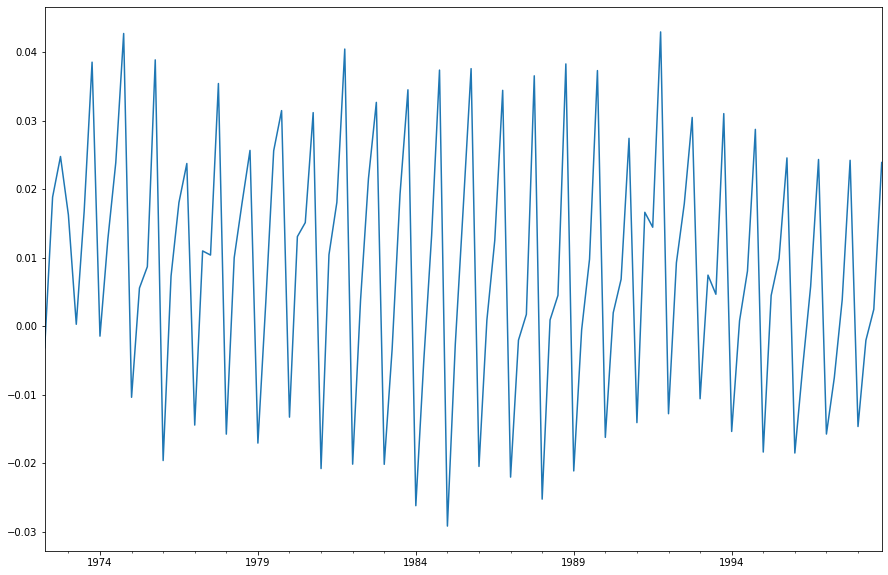

In [8]:
dp.plot(figsize=(15, 10))

Text(0, 0.5, 'X_t+4')

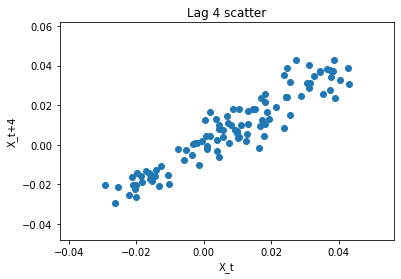

In [9]:
dp2 = dp.copy()
dp2.index = list(range(dp.shape[0]))

lag = 4
plt.scatter(dp2.loc[:dp2.shape[0] - 1 - lag], dp2.loc[lag:dp2.shape[0] - 1])
plt.title(f"Lag {lag} scatter")
plt.xlabel("X_t")
plt.ylabel(f"X_t+{lag}")

/home/olga/Projects/CPI/venv/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


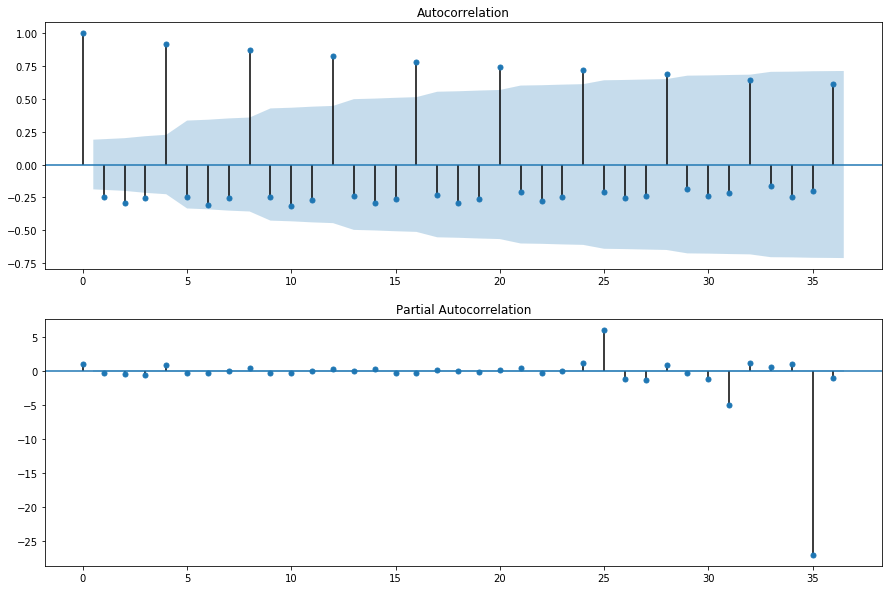

In [10]:
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dp.values.squeeze(), lags=36, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dp, lags=36, ax=ax2)

We can see that lag correlation has a strong period of 4

And the highest absolute value of pacf is on the 35-th value

In [11]:
arma_mod = sm.tsa.ARMA(dp, (4, 0)).fit(disp=False)

In [12]:
print(arma_mod.params)

const       0.008342
ar.L1.Dp   -0.057108
ar.L2.Dp   -0.055642
ar.L3.Dp   -0.048395
ar.L4.Dp    0.886463
dtype: float64


In [13]:
dp_predict = arma_mod.predict('1990Q1', '2001Q1', dynamic=True)


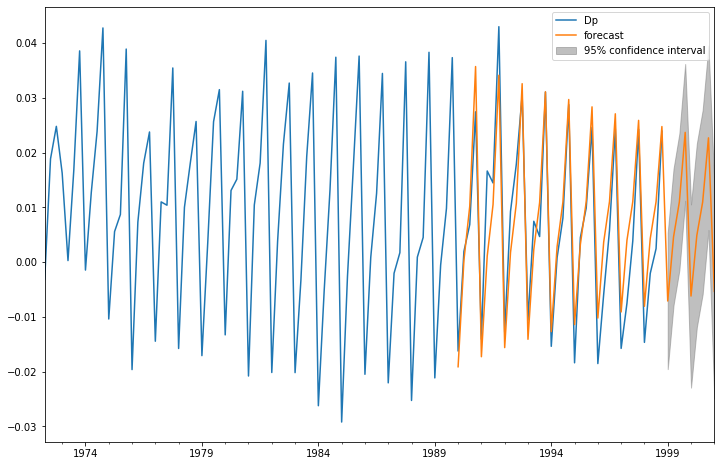

In [14]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = dp.loc['1950':].plot(ax=ax)
fig = arma_mod.plot_predict('1990Q1', '2001Q1', dynamic=True, ax=ax, plot_insample=False)